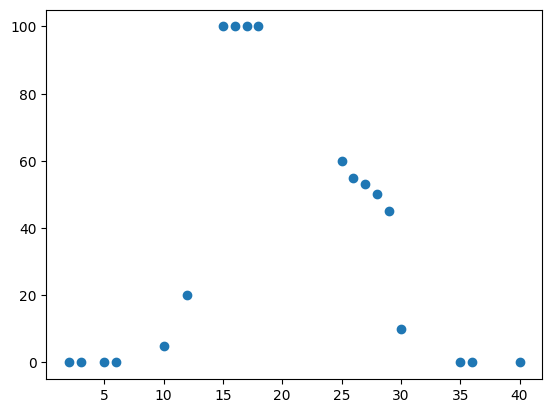

0


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import mean_squared_error, r2_score
import math




df = pd.read_csv('House_Price.csv')
y = df.price
#print(y)
x = df
x = x.drop('price', axis=1)
#print(x)

trainSplit = int(len(y)*0.8)
trainY = y[0:trainSplit]
trainX = x[0:trainSplit]
testY = y[trainSplit:]
testX = x[trainSplit:]


trainX = [2,3,5,6,10,12,15,16,17,18,25,26,27,28,29,30,35,36,40]
trainY = [0,0,0,0,5,20,100,100,100,100,60,55,53,50,45,10,0,0,0]
plt.scatter(trainX,trainY)
plt.show()
#print(len(trainY))
#print(len(trainX))
class Node():
    def __init__(self, **kwargs):
        self.left = None
        self.right = None
        self.decision = None
        if 'nodeValue' in kwargs:            
            self.nodeValue = kwargs['nodeValue']
        else:
            self.nodeValue = None

    #def setA(self, decision):
    #    self.decision = decision

def resError(y,prediction):
    error = 0
    for i in y:
        error += (i-prediction)**2
    return error

def build(x,y, threshold):
    leaf = Node()
    if len(y) < 4:
        #print(y)
        setattr(leaf,'nodeValue',statistics.mean(y))
        #leaf.nodeValue = statistics.mean(y)
        return leaf
    
    average = []
    error = []

    for i in range(len(y)-1):
        average.append((x[i]+x[i+1])/2)
        error.append(resError(y,average[i]))

    minErrorIdx = error.index(min(error))
    #print(minErrorIdx)
    #print(len(y))
    #print(x[minErrorIdx:],y[minErrorIdx:])
    #print(x[:minErrorIdx],y[:minErrorIdx])
    #print(average)
    setattr(leaf,'decision',x[minErrorIdx])
    if minErrorIdx > 0:
        setattr(leaf,'left',build(x[:minErrorIdx],y[:minErrorIdx],threshold))
    else:
        setattr(leaf,'left',Node(nodeValue=y[0]))
    if minErrorIdx < len(y):
        setattr(leaf,'right',build(x[minErrorIdx+1:],y[minErrorIdx+1:],threshold))
    else:
        setattr(leaf,'right',Node(nodeValue=y[0]))
    #plt.scatter(np.linspace(0,len(error)+1,num=len(error)),error)
    #plt.show()
    return leaf

def predict(node, prediction):
    if node.decision == None:
        #print("set")
        return node.nodeValue
    elif prediction > node.decision:
        if node.right:
            #print("right")
            return predict(node.right, prediction)
        else:
            return node.nodeValue
    else:
        if node.left != None:
            #print("left")
            return predict(node.left, prediction)
        else:
            return node.nodeValue

root = build(trainX,trainY,30)

print(predict(root,2))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics


df = pd.read_csv('House_Price.csv')
df = df.drop('airport', axis=1)
df = df.drop('waterbody', axis=1)
df = df.drop('bus_ter', axis=1)
df = df.dropna()
y = df.price
#print(y)
x = df
x = x.drop('price', axis=1)
#print(x)

trainSplit = int(len(y)*0.8)
trainY = y[0:trainSplit]
trainX = x[0:trainSplit]
testY = y[trainSplit:]
testX = x[trainSplit:]

#trainX = [2,3,5,6,10,12,15,16,17,18,25,26,27,28,29,30,35,36,40]
#trainY = [0,0,0,0,5,20,100,100,100,100,60,55,53,50,45,10,0,0,0]
#plt.scatter(trainX,trainY)
#plt.show()
#print(len(trainY))
#print(len(trainX))
class Node():
    def __init__(self, **kwargs):
        self.left = None
        self.right = None
        self.decision = None
        self.attr = None
        if 'nodeValue' in kwargs:            
            self.nodeValue = kwargs['nodeValue']
        else:
            self.nodeValue = None

    #def setA(self, decision):
    #    self.decision = decision

def resError(y,prediction):
    error = 0
    for i in y:
        error += (i-prediction)**2
    return error/len(y)

def getMin(x,y):
    average = []
    error = []
    #print(x)
    x, y = zip(*sorted(zip(x, y)))
    #for i in x:
    #    print(i)
    #print("NEXT")
    for i in range(len(y)-1):
        average = (y[i]+y[i+1])/2
        error.append(resError(y,average))
        #error.append(mean_squared_error(y,average))
    minErrorIdx = error.index(min(error))
    return minErrorIdx, min(error)

def build(x,y, threshold):
    leaf = Node()
    x = x.reset_index(drop=True)
    y = y.reset_index(drop=True)
    if len(y) < threshold*2:
        #print(y)
        setattr(leaf,'nodeValue',statistics.mean(y))
        #print("remained points in leaf",len(y))
        #leaf.nodeValue = statistics.mean(y)
        return leaf
    
    idxList = []
    errorList = []
    nameList = []
    
    for i in range(x.shape[1]):
        name = x.columns[i]
        nameList.append(name)
        minErrorIdx, error = getMin(x.loc[:,name],y)
        errorList.append(error)
        idxList.append(minErrorIdx)

    #print(errorList)
    #print(idxList)
    #print(nameList)
    minValue = 90000
    tempIdx = 0
    median = len(y)/2
    for i in range(0,len(errorList)):
        if errorList[i] < minValue:
            minValue = errorList[i]
            tempIdx = idxList[i]
        if errorList == minValue:
            if abs(idxList[i]-median) < abs(tempIdx-median):
                minValue = errorList[i]
                tempIdx = idxList[i]

    minErrorIdx = tempIdx
    #minErrorIdx = idxList[errorList.index(min(errorList))]
    #name = nameList[errorList.index(min(errorList))]
    name = nameList[idxList.index(minErrorIdx)]
    test =  x.join(y)
    test = test.sort_values(by=[name], ascending=True)
    #print(test)
    y = test.price
    #print(y)
    x = test
    x = x.drop('price', axis=1)

    #print("i have elements in x",x.shape[0],"and now i want to take out one on idx",minErrorIdx)
    #print(min(errorList))
    #print(minErrorIdx)
    #print(nameList[minErrorIdx])
    #print(minErrorIdx)
    #print(len(y))
    #print(x[minErrorIdx:],y[minErrorIdx:])
    #print(x[:minErrorIdx],y[:minErrorIdx])
    #print(average)
    setattr(leaf,'attr',name)
    #print("THIS SOME BULL",x.loc[:,name][minErrorIdx])
    #print(x[minErrorIdx+1:])
    #print("my name is ",nameList[minErrorIdx],"and i want index",minErrorIdx,"from array of names",nameList)
    #print(x.loc[:,name])
    #print("Do i crash here ?")
    setattr(leaf,'decision',x.loc[:,name][minErrorIdx])
    #print(error)
    if minErrorIdx > threshold:
        #print("My error idx",minErrorIdx)
        #print("lenght of my x",x.shape[1])
        setattr(leaf,'left',build(x[:minErrorIdx-1],y[:minErrorIdx-1],threshold))
    else:
        #print(y[0])
        #print("remained points in leaf",len(y))
        setattr(leaf,'left',Node(nodeValue=statistics.mean(y)))
    #print("my len", len(x), len(y))
    if (x.shape[0]-minErrorIdx) > threshold :
        #print("My error idx",minErrorIdx)
        #print("lenght of my x",x.shape[1])
        setattr(leaf,'right',build(x[minErrorIdx+1:],y[minErrorIdx+1:],threshold))
    else:
        #if len(y) < 1:
        #print("kek")
        #print("remained points in leaf",len(y))
        setattr(leaf,'right',Node(nodeValue=statistics.mean(y)))
        #else:
        #    setattr(leaf,'nodeValue',statistics.mean(y))
    #plt.scatter(np.linspace(0,len(error)+1,num=len(error)),error)
    #plt.show()
    return leaf

#print(trainX)
#print(trainY)
root = build(trainX,trainY,20)
#print(predict(root,10))
#print(trainX.shape[1])
#for i in range(trainX.shape[0]):
#    name = trainX.columns[i]
#    print(trainX.loc[:,name])


In [3]:
def drawTree(ax,tree,depth,x):
    ax.plot(x,depth,'ro')
    ax.annotate(tree.attr, (x,depth))
    ax.annotate(tree.decision, (x,depth+0.2))
    ax.annotate(tree.nodeValue, (x,depth))
    #if tree.nodeValue:
       # print(tree.nodeValue,depth)
    dist = 10
    if tree.left:
        drawTree(ax,tree.left,depth+1,x-dist)
    if tree.right:
        drawTree(ax,tree.right,depth+1,x+dist)


#ax = plt.subplot()
#drawTree(ax,root,0,0)
#print(testX.iloc[1])
#predicted = predict(root,testX.iloc[1])

In [4]:
def predict(node, prediction):
    
    if node.decision == None:
        #print("set")
        return node.nodeValue
    else:
        attr = node.attr
        name = ''
        for i in range(0,trainX.shape[1]):
            name = trainX.columns[i]
            if name == attr:
                #print("my name is",attr)
                predValue = prediction.loc[name]
                break
        
        #print("chosen attr", name,"with value", predValue)
        if predValue > node.decision:
            if node.right:
                #print("The value",predValue,"is bigger than",node.decision)
                #print("right")
                return predict(node.right, prediction)
            else:
                return node.nodeValue
        else:
            if node.left != None:
                #print("The value",predValue,"is smaller than",node.decision)
                #print("left")
                return predict(node.left, prediction)
            else:
                return node.nodeValue
error = 0
resArr = []
#print(root.attr)
from sklearn.metrics import mean_squared_error, r2_score
for i in range(0,testX.shape[0]):
    predicted = predict(root,testX.iloc[i])
    resArr.append(predicted)
    error += (testY.iloc[i] - predicted)**2
    #print(testY.iloc[i])
    #print(testY.iloc[i]-predicted)
    #print(predict(root,testX.iloc[3]))
    #print(testY.iloc[3])
#print(root.left.right.right.right.nodeValue)
print(mean_squared_error(testY,resArr))
print(error)
#print(testY)
print(resArr)
depth = 0
def walk(tree, depth):
    #if tree.attr != None: print(tree.nodeValue,depth)
    if tree.right != None:
        walk(tree.right,depth+1)
    if tree.left != None:
        walk(tree.left,depth+1)
    #print("I AM ON DEPTH",depth)
    #print(tree.nodeValue)
walk(root,depth)

41.325134158940266
4132.5134158940255
[17.507142857142856, 15.808571428571428, 15.204166666666667, 26.9265625, 15.808571428571428, 15.808571428571428, 26.9265625, 17.507142857142856, 17.507142857142856, 15.808571428571428, 15.808571428571428, 17.507142857142856, 17.507142857142856, 17.507142857142856, 15.808571428571428, 15.808571428571428, 17.507142857142856, 26.9265625, 17.507142857142856, 15.808571428571428, 15.808571428571428, 17.507142857142856, 26.9265625, 17.507142857142856, 17.507142857142856, 17.507142857142856, 15.808571428571428, 26.9265625, 15.808571428571428, 15.808571428571428, 17.507142857142856, 15.808571428571428, 17.507142857142856, 17.507142857142856, 17.507142857142856, 15.808571428571428, 17.507142857142856, 15.808571428571428, 15.808571428571428, 15.808571428571428, 15.808571428571428, 17.507142857142856, 17.507142857142856, 17.507142857142856, 15.808571428571428, 17.507142857142856, 15.808571428571428, 15.808571428571428, 15.808571428571428, 15.808571428571428, 1

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


#print(cross_val_score(model, testX, testY, cv=10))
model = DecisionTreeRegressor(random_state=0,min_samples_leaf = 20)
model.fit(trainX,trainY)
res = model.predict(testX)
err = 0
#print(res)
for i in range(len(res)):     
    err += (testY.iloc[i] - res[i])**2

print(mean_squared_error(testY,res))
print(res)

25.153084128659053
[10.98571429 10.98571429 10.98571429 20.74814815 10.98571429 29.212
 20.74814815 10.98571429 10.98571429 10.98571429 10.98571429 10.98571429
 10.98571429 10.98571429 29.212      10.98571429 10.98571429 20.74814815
 10.98571429 10.98571429 10.98571429 10.98571429 10.98571429 10.98571429
 10.98571429 10.98571429 29.212      20.74814815 15.3        10.98571429
 10.98571429 10.98571429 10.98571429 10.98571429 10.98571429 10.98571429
 10.98571429 10.98571429 10.98571429 10.98571429 10.98571429 10.98571429
 10.98571429 10.98571429 10.98571429 10.98571429 15.3        15.3
 29.212      10.98571429 15.3        15.3        10.98571429 10.98571429
 10.98571429 15.3        15.3        20.74814815 20.74814815 22.485
 22.485      15.3        15.3        10.98571429 10.98571429 15.3
 22.485      22.485      29.212      10.98571429 10.98571429 15.3
 10.98571429 10.98571429 20.74814815 22.485      26.90714286 29.212
 19.14       19.14       20.355      10.98571429 22.485      20.4434

In [7]:
#setattr(leaf,'right',build(x[minErrorIdx+1:],y[minErrorIdx+1:],threshold))
def k_fold(X, y, fold):
    score_mean_squared = 0
    #score_r2 = 0
    counter = 0
    step_size = int(X.shape[0]/fold)
    #print(step_size)
    for i in range(0,X.shape[0]-step_size,step_size):
        testX = X[i:i+step_size]        
        testY = y[i:i+step_size]    
        trainX = X[0:i]
        trainX = trainX.append(X[i+step_size+1:], ignore_index=True)        
        #trainX = np.append(trainX,X[i+step_size+1:], axis=0)
        #print(len(trainX))
        trainY = y[0:i]
        #trainY = np.append(trainY,y[i+step_size+1:], axis=0)
        trainY = trainY.append(y[i+step_size+1:], ignore_index=True)
        root = build(trainX, trainY, 20)
        resArr = []
        for j in range(0,testX.shape[0]):
            predicted = predict(root,testX.iloc[j])
            resArr.append(predicted)
            #score_mean_squared += (testY.iloc[i] - predicted)**2
        score_mean_squared += mean_squared_error(testY,resArr)
        #print("error on ours on",i,"itteration",mean_squared_error(testY,resArr))
        #model = DecisionTreeRegressor(random_state=0)
        #model.fit(trainX,trainY)
        
        #y_pred_sclearn = predict(reg, testX)
        #score_mean_squared += mean_squared_error(testY, 1)
        #score_r2 = r2_score(testY, y_pred_sclearn)
        counter += 1
    return score_mean_squared/counter

def k_fold_sci(X, y, fold):
    score_mean_squared = 0
    #score_r2 = 0
    counter = 0
    step_size = int(X.shape[0]/fold)
    #print(step_size)
    for i in range(0,X.shape[0]-step_size,step_size):
        testX = X[i:i+step_size]        
        testY = y[i:i+step_size]    
        trainX = X[0:i]
        trainX = trainX.append(X[i+step_size+1:], ignore_index=True)        
        trainY = y[0:i]
        trainY = trainY.append(y[i+step_size+1:], ignore_index=True)
        model = DecisionTreeRegressor(random_state=0, min_samples_leaf=20, min_samples_split=40)
        model.fit(trainX,trainY)
        res = model.predict(testX)
        #print("lenght res",len(res),"len test",len(testY))
        score_mean_squared += mean_squared_error(testY, res)
        #print("Error on scikit on",i,"itteration",mean_squared_error(testY,res))
        counter += 1
    return score_mean_squared/counter


print("10 fold mean sqared error on our model",k_fold(x,y,10))
print("10 fold mean sqared error on scikit model",k_fold_sci(x,y,10))

10 fold mean sqared error on our model 76.16010970638641
10 fold mean sqared error on scikit model 30.648700247406037
